# 19M18850 Ong Yuh Chian

In [1]:
# To remove MatplotlibDeprecationWarning: The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
# if not cb.iterable(width):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Importing libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1
Breadth-First Search

Known : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


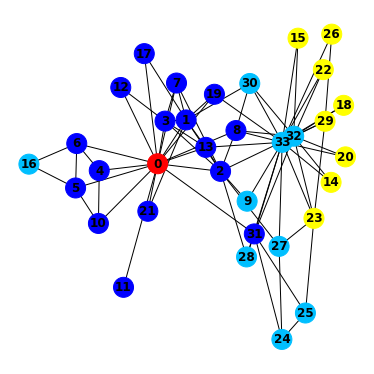

In [2]:
G = nx.karate_club_graph()
known = [0] * nx.number_of_nodes(G)  # ordered in order of node number
dist = [-1] * nx.number_of_nodes(G)  # ordered in order of node number
lst = [-1] * nx.number_of_nodes(G)   # ordered in increasing distance from 0
read_pointer = 0
write_pointer = read_pointer + 1

colors = ['red', 'blue', 'deepskyblue', 'yellow', 'springgreen', 'lightskyblue', 'darkgreen', 'green', 'lightgreen', 'gray', 'lightgray']
color_map = ['black'] * nx.number_of_nodes(G)

lst[0] = 0 # start from 0
dist[read_pointer] = 0 # distance 0
color_map[read_pointer] = colors[dist[read_pointer]]
known[read_pointer] = 1

# ANSWER TO QN 1

# Calculate 
while read_pointer < write_pointer:
    for neighbor in G.adj[lst[read_pointer]]:
        # Caution! "known" and "color_map" are arrays that correspond to node number order
        # whereas lst and dist are order according to the queue
        if known[neighbor] != 1:
            lst[write_pointer] = neighbor
            known[neighbor] = 1
            dist[write_pointer] = dist[read_pointer] + 1
            color_map[neighbor] = colors[dist[write_pointer]]
            write_pointer += 1
    read_pointer += 1
        
print("Known :", known)
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')

# Question 2
Show the final status of distance array and queue after BFS is done from vertex 0 of Karate club network.

In [3]:
# Final Status of Queue and Distance Array (Ordered by Queue)
pd.set_option('display.max_columns', 34)
final_status = pd.DataFrame(list(zip(lst, dist)), columns = ["Queue", "Dist"])
final_status.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
Queue,0,1,2,3,4,5,6,7,8,10,11,12,13,17,19,21,31,30,9,27,28,32,16,33,24,25,23,14,15,18,20,22,29,26
Dist,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3


In [4]:
# Final Status of Distance Array (Ordered by Node Number)
final_status.columns = ['Nodes', 'Distance']
final_status.sort_values(by = "Nodes", axis=0, ascending=True, inplace=False, kind='quicksort').style.hide_index()

Nodes,Distance
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,2


# Question 3

Explain why BFS is not good for networks with varying edge lengths.

Calculating the path by train between two points may require factoring in edge lengths.

Assume there exists 2 routes:
- direct --- A <-> C  (60 minutes)
- indirect - A <-> B <-> C (2 x 20 minutes)

While the direct route requires 0 transfers (because it is adjacent), it actually takes more time (longer edge length). 

Using Breadth-First Search (BFS) would be efficient in uncovering routes requiring the least transfers, but would be much less efficient identifying routes of shortest path-lengths, especially when the network is large.